EXAMINAR DADOS

In [17]:
import pandas as pd
import  numpy as np
from matplotlib import pyplot as plt

dados = [50,50,47,97,49,3,53,42,26,74,82,62,37,15,70,27,36,35,48,52,63,64]
notas = np.array(dados)

horas_studo= [10.0,11.5,9.0,16.0,9.25,1.0,11.5,9.0,8.5,14.5,15.5,
               13.75,9.0,8.0,15.5,8.0,9.0,6.0,10.0,12.0,12.5,12.0]

dados_estudante = np.array([horas_studo, notas])

df_estudantes = pd.DataFrame({'Nome': ['Dan', 'Joann', 'Pedro', 'Rosie', 'Ethan', 'Vicky', 'Frederic', 'Jimmie', 
                                     'Rhonda', 'Giovanni', 'Francesca', 'Rajab', 'Naiyana', 'Kian', 'Jenny',
                                     'Jakeem','Helena','Ismat','Anila','Skye','Daniel','Aisha'],
                            'Horasestudos':dados_estudante[0],
                            'Notas':dados_estudante[1]})

display(df_estudantes)

,Nome,Horasestudos,Notas
0,Dan,10.00,50.0
1,Joann,11.50,50.0
2,Pedro,9.00,47.0
3,Rosie,16.00,97.0
4,Ethan,9.25,49.0
5,Vicky,1.00,3.0
6,Frederic,11.50,53.0
7,Jimmie,9.00,42.0
8,Rhonda,8.50,26.0
9,Giovanni,14.50,74.0


         Nome  Horasestudos  Notas  Passou
0         Dan         10.00   50.0   False
1       Joann         11.50   50.0   False
2       Pedro          9.00   47.0   False
3       Rosie         16.00   97.0    True
4       Ethan          9.25   49.0   False
5       Vicky          1.00    3.0   False
6    Frederic         11.50   53.0   False
7      Jimmie          9.00   42.0   False
8      Rhonda          8.50   26.0   False
9    Giovanni         14.50   74.0    True
10  Francesca         15.50   82.0    True
11      Rajab         13.75   62.0    True
12    Naiyana          9.00   37.0   False
13       Kian          8.00   15.0   False
14      Jenny         15.50   70.0    True
15     Jakeem          8.00   27.0   False
16     Helena          9.00   36.0   False
17      Ismat          6.00   35.0   False
18      Anila         10.00   48.0   False
19       Skye         12.00   52.0   False
20     Daniel         12.50   63.0    True
21      Aisha         12.00   64.0    True
Minimum:3.0

C:\Users\mlima17\AppData\Local\Temp\ipykernel_18936\230582571.py:35: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


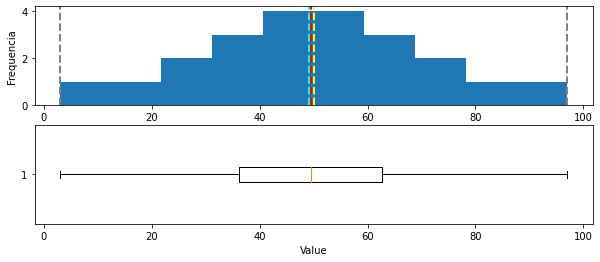

In [18]:
# ANALISE DOS DADOS

#calculo para quem passou com nota azima de 60
passar = pd.Series(df_estudantes['Notas'] >= 60)
df_estudantes = pd.concat([df_estudantes, passar.rename('Passou')], axis=1)
print(df_estudantes)

#função para fazer a distribuição (gráfica) e mostra-la
def show_distribuition(var_data):
    min_val = var_data.min() #menor valor
    max_val = var_data.max() #max valor
    mean_val = var_data.mean()  #media
    med_val = var_data.median()  #mediana
    mod_val = var_data.mode()[0]  #moda

    print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val, max_val, mean_val, med_val, mod_val))

    #GRAFICOS
    fig, ax = plt.subplots(2,1, figsize = (10,4))

    #histograma
    ax[0].hist(var_data)
    ax[0].set_ylabel('Frequencia')

    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

    #boxplot
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Value')
    
    fig.show()

show_distribuition(df_estudantes['Notas'])

Minimum:1.00
Mean:16.00
Median:10.52
Mode:10.00
Maximum:9.00



C:\Users\mlima17\AppData\Local\Temp\ipykernel_18936\230582571.py:35: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


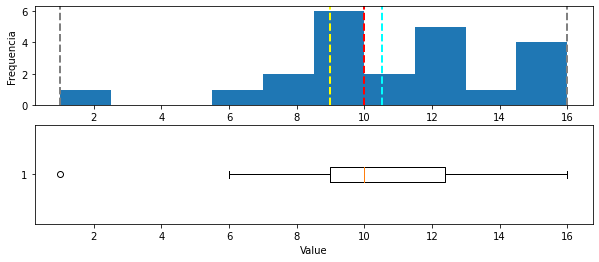

In [19]:
#analisando a distribuiçao de horas de estudo
col = df_estudantes['Horasestudos']
show_distribuition(col)

#maior quantidade de valor esta acima de 6
#menor valor começa com um o, que esta fora do intervalo de distribuiçao

Minimum:6.00
Mean:16.00
Median:10.98
Mode:10.00
Maximum:9.00



C:\Users\mlima17\AppData\Local\Temp\ipykernel_18936\230582571.py:35: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


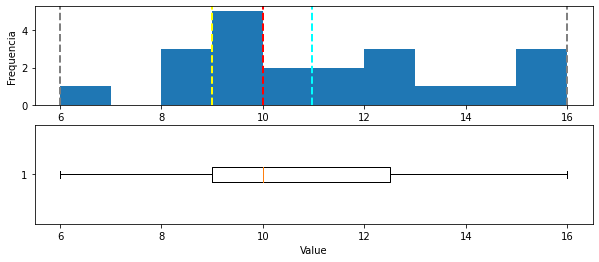

In [20]:
#removendo os outliers do gráfico
#outlier removido o boxplot mostra os dados dentro dos quartis
q01 = df_estudantes.Horasestudos.quantile(0.01)
col = df_estudantes[df_estudantes.Horasestudos>q01]['Horasestudos']
show_distribuition(col)

In [33]:
#Range = variaçao entre minimo e maximo
#Variancia = media da diferença quadrada da media
#Desvio padrao 

for col_name in ['Notas', 'Horasestudos']:
    col = df_estudantes[col_name]
    rng = col.max() - col.min()
    var = col.var()
    std = col.std()
    
    print('\n{}:\n - Variaçao: {:.2f}\n - Variancia: {:.2f}\n - Desvio: {:.2f}'.format(col_name, rng, var, std))



Notas:
 - Variaçao: 94.00
 - Variancia: 472.54
 - Desvio: 21.74

Horasestudos:
 - Variaçao: 15.00
 - Variancia: 12.16
 - Desvio: 3.49


In [34]:
df_estudantes.describe()

,Horasestudos,Notas
count,22.000000,22.000000
mean,10.522727,49.181818
std,3.487144,21.737912
min,1.000000,3.000000
25%,9.000000,36.250000
50%,10.000000,49.500000
75%,12.375000,62.750000
max,16.000000,97.000000


COMPARANDO VARIAVEIS NUMERICAS E CATEGORICAS

<AxesSubplot:title={'center':'Horasestudos'}, xlabel='Passou'>

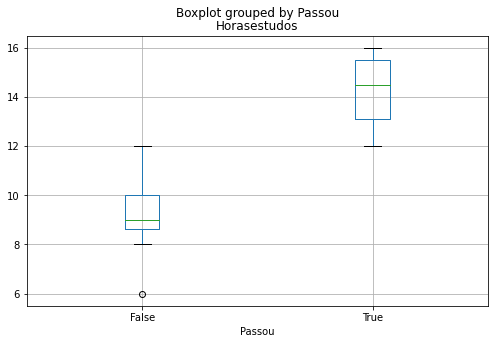

In [38]:
#comparando dados
df_sample = df_estudantes[df_estudantes['Horasestudos']>1]
df_sample
df_sample.boxplot(column='Horasestudos', by='Passou', figsize=(8,5))

COMPARANDO VARIAVEIS NUMERICAS

<AxesSubplot:xlabel='Nome'>

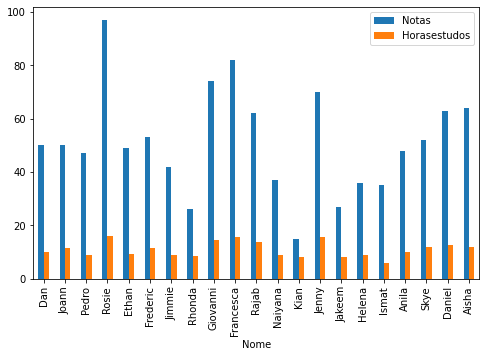

In [39]:
#grafico de barras de nome vs notas e horas de estudos
df_sample.plot(x='Nome', y=['Notas', 'Horasestudos'], kind = 'bar', figsize = (8,5))

<AxesSubplot:title={'center':'Horas estudos vs Nota'}, xlabel='Horasestudos', ylabel='Notas'>

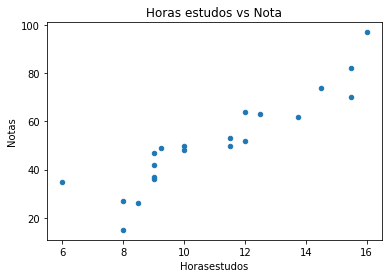

In [41]:
#grafico de dispercao
df_sample.plot.scatter(title ='Horas estudos vs Nota', x = 'Horasestudos', y = 'Notas')